In [10]:
from HOCMO import hocmo
import importlib

In [11]:
importlib.reload(hocmo)

<module 'HOCMO.hocmo' from '/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py'>

In [12]:
incidence_matrix,incidence_matrix_binary,protein_names,disease_names,gene_names,tensor = hocmo.createTensor('HOCMO_test.csv','CRs',5,5)

Size of the tensor: (5, 5, 5)


tensor size: (5, 5, 5)


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:94: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap='cm.coolwarm')


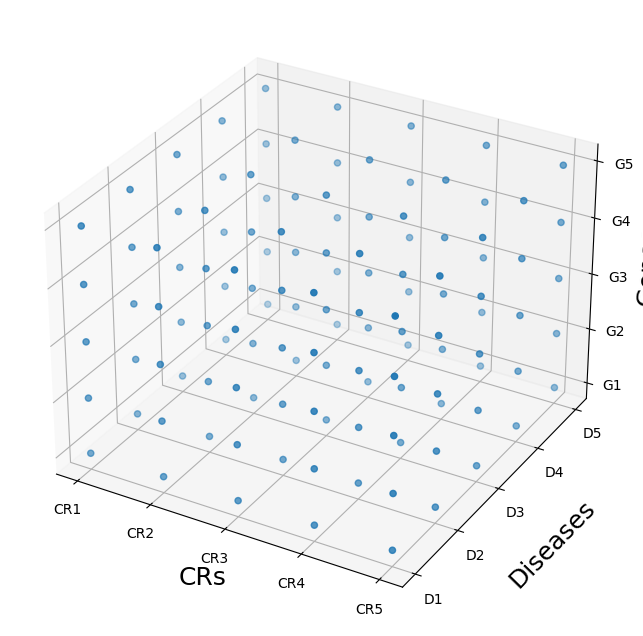

array([[[0.8894966 , 0.24431013, 0.97649195, 0.9319646 , 0.94539071],
        [0.24728567, 0.10842904, 0.18528397, 0.93951033, 0.37862826],
        [0.49790879, 0.34886467, 0.71324986, 0.85690116, 0.86238205],
        [0.95674425, 0.44423434, 0.72790213, 0.31252685, 0.33879375],
        [0.86652523, 0.40083206, 0.07311923, 0.90041889, 0.51105878]],

       [[0.41696817, 0.08903526, 0.70953601, 0.37787303, 0.36396489],
        [0.47594022, 0.86045558, 0.97985862, 0.61152541, 0.00152071],
        [0.93318536, 0.91280677, 0.13076751, 0.59804871, 0.8713225 ],
        [0.49171691, 0.84070258, 0.31553765, 0.92702822, 0.38850498],
        [0.61263533, 0.79837727, 0.58867055, 0.42980354, 0.90516288]],

       [[0.84253618, 0.74115325, 0.15274159, 0.99833939, 0.80439887],
        [0.9966027 , 0.62960701, 0.04867998, 0.21832862, 0.25400222],
        [0.48136462, 0.36220248, 0.59971559, 0.8761762 , 0.25692728],
        [0.50715526, 0.25985599, 0.75498626, 0.94109993, 0.92789119],
        [0.79505

In [13]:
hocmo.basicVisual(tensor, 'CRs', 'Diseases', 'Genes', protein_names, disease_names,gene_names, './data/','test')

In [ ]:
components = hocmo.getCoreConsistency(tensor, "./data/core_consistency_rppa.png", iters = 100, num_k = 11, start =2, top_k=20)


In [14]:
components = 2
A,B,C = hocmo.factorize(tensor, components, method="ncp")

[A,B,C]: (5, 2) (5, 2) (5, 2)


In [15]:
component_preds_A, component_preds_B = hocmo.componentPredictionsForFactors(A,B)

5 inputs in total, each input belongs to a predicted component with the largest membership value:

 [0 1 0 1 1]
5 inputs in total, each input belongs to a predicted component with the largest membership value:

 [0 1 0 0 0]


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(x_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:236: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:243: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(y_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:244: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:250: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(z_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:251: UserWarning: FixedFormatter should only be used together with FixedLocator


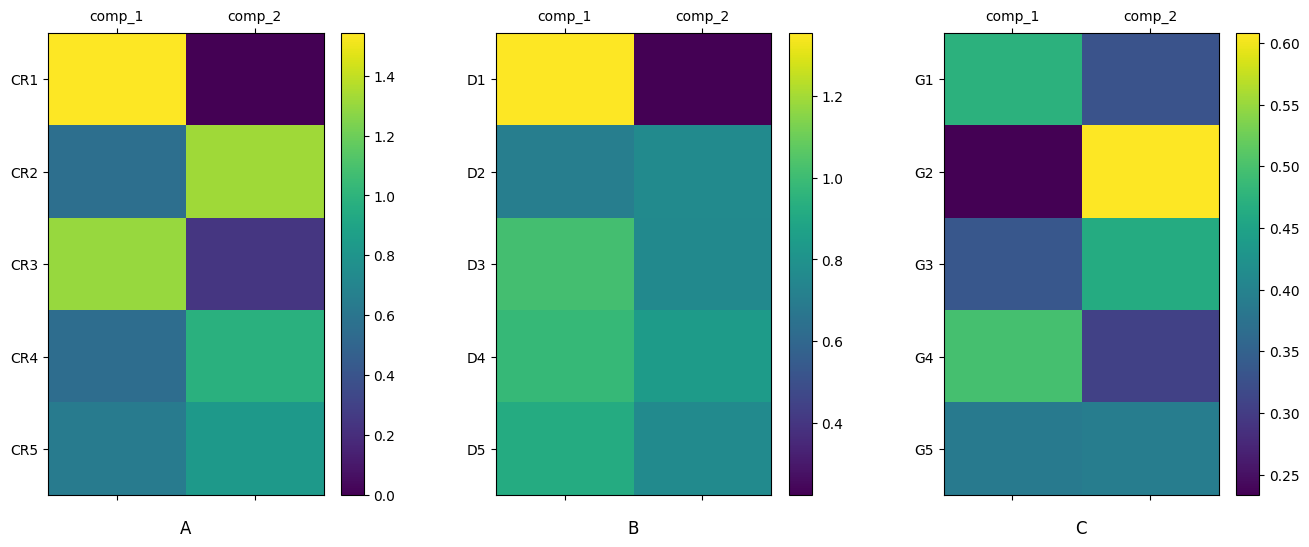

In [16]:
hocmo.plotFactorMatrices(A, B, C, components, './data/A_rppa.png', './data/B_rppa.png', './data/C_rppa.png', protein_names,disease_names,gene_names)

['0~1', '2~4']
(5, 5, 5)


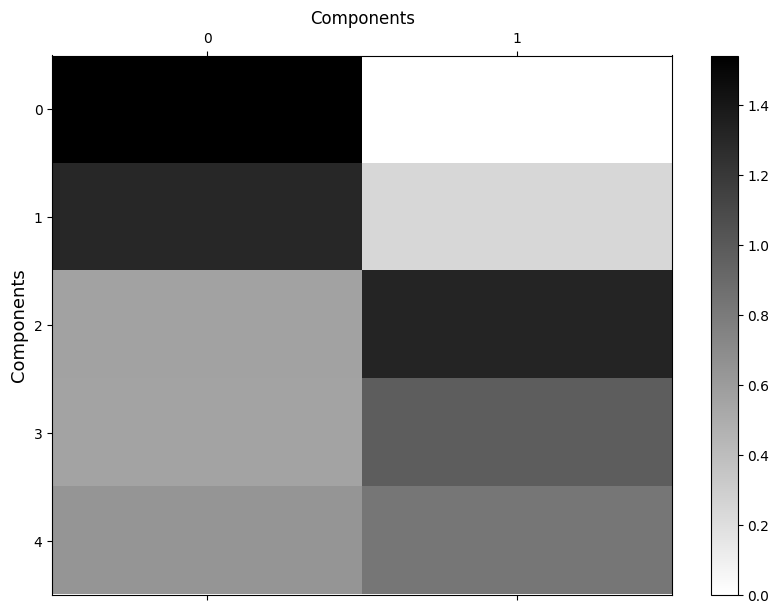

In [17]:
tensor_binary, A_ranked, A_names_ranked, A_clusters = hocmo.getClusterMembershipProbabilityA(A, components, component_preds_A,  incidence_matrix_binary, incidence_matrix,
                                                        'Components', 'Proteins', "./data/A_ranked_per_cluster.png", )
##What makes "A" A? Why is A disease and not protein etc etc?
##What is supposed to be on the y axis?

['0~3', '4~4']


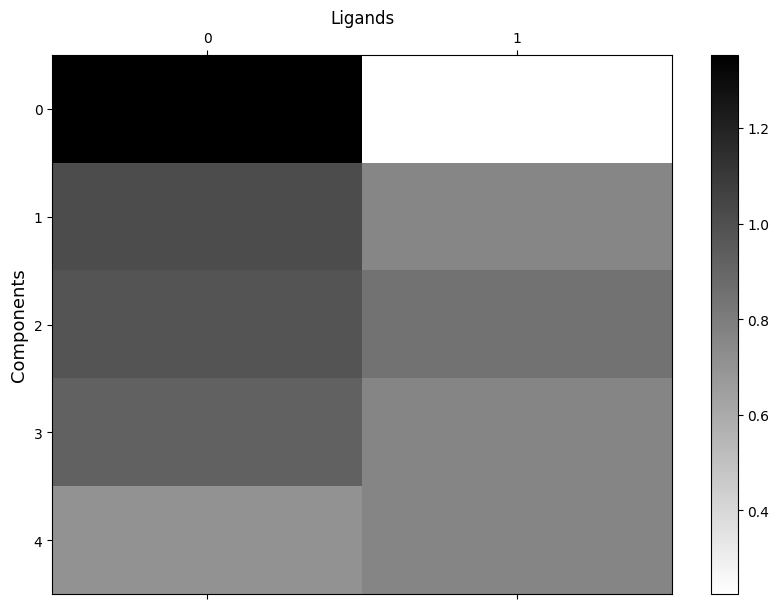

In [18]:
B_ranked, B_names_ranked, B_clusters = hocmo.getClusterMembershipProbability(B, components, component_preds_B, disease_names, 'Components', 'Ligands', "./data/B_ranked_per_cluster.png")


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:428: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(A_names_ranked.insert(0,'')) ####How to make this graph pleasing (dynamically) for larger plots??
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:429: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, fontsize=12) ##number of components
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:439: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(B_names_ranked.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:440: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels, fontsize=12)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:447: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(C_names.insert(0,''))
/u

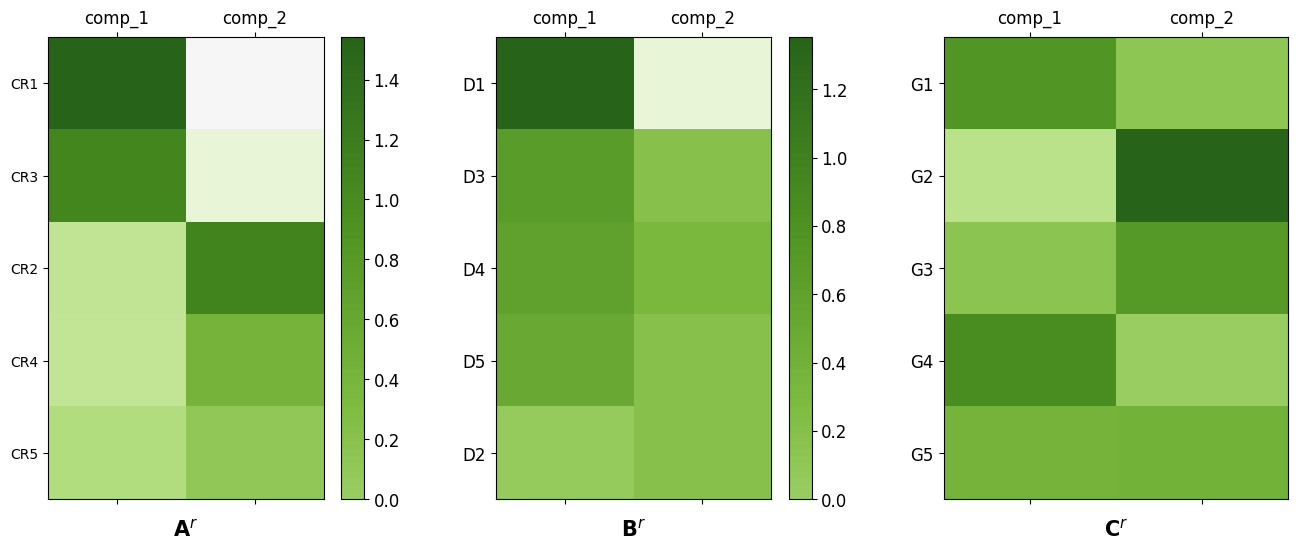

In [19]:
hocmo.plotLatentFactor(A_ranked, B_ranked, C, components, A_names_ranked, B_names_ranked, gene_names, './data/')

In [20]:
hocmo.saveFactorsToExcel(A_ranked, B_ranked, C, components, A_names_ranked, B_names_ranked, gene_names, './data/', "latentFactors.xlsx")

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:480: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [21]:
proteins = hocmo.entitiesPerCluster(A_clusters, protein_names)

Entity cluster 1: CR2 CR4 CR5



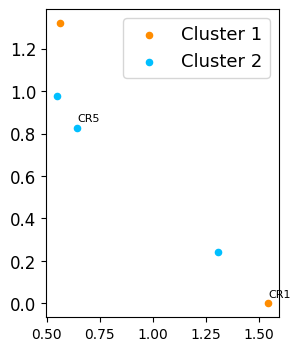

['', 'CR1', '', '', '', 'CR5']


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1010: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(show_y_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1014: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels,fontsize=12)


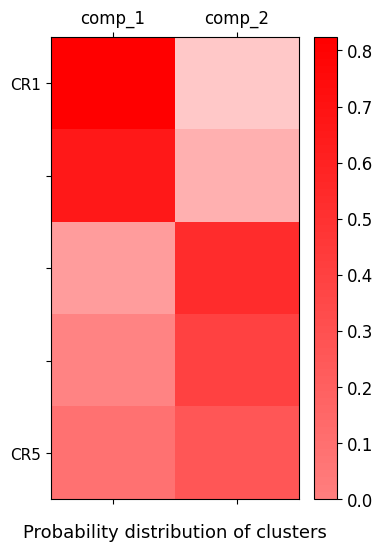

In [22]:
hocmo.plotForFactorMatrix(A_ranked, A_clusters, A_names_ranked, components,"proteins_per_cluster_scatter_plot.png", './data/' ,"proteins_per_cluster_probability.png")

(5, 5)


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1059: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1064: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


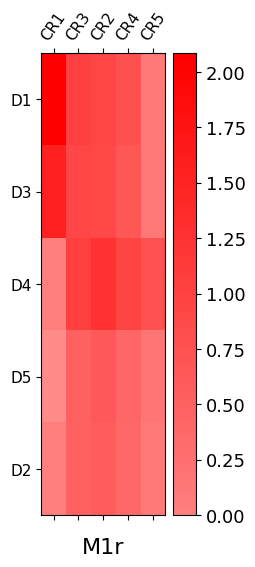

mean:1.36682190597627, std:0.25729994046902344


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1091: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


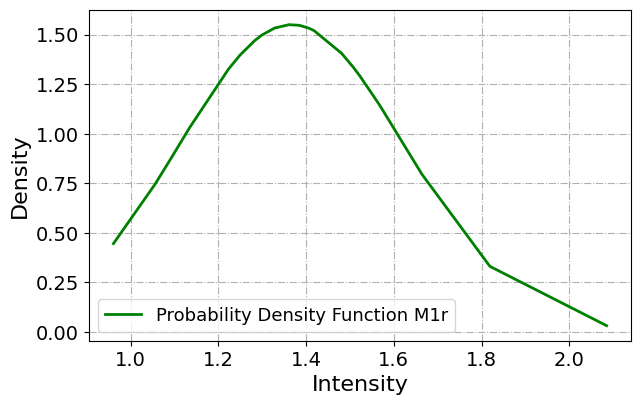

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1121: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1059: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1064: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


(5, 5)


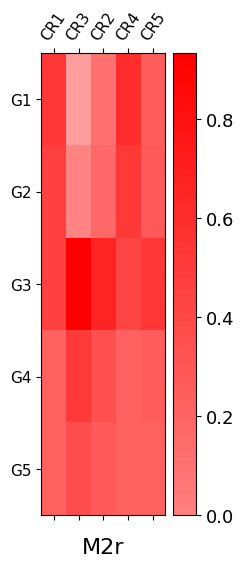

mean:0.6366164313610357, std:0.11540828815321462


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1091: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


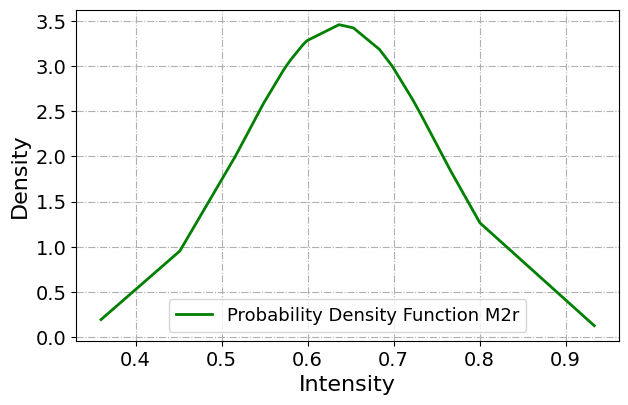

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1121: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1059: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1064: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


(5, 5)


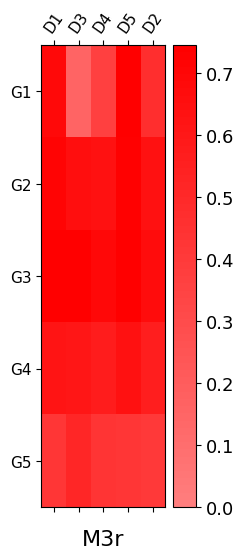

mean:0.6648420563000376, std:0.07269822858279741


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1091: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


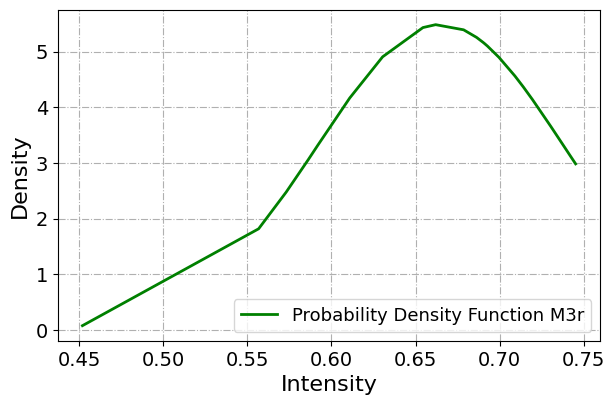

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1121: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore


In [23]:
patterns_list, means_list, std_list = hocmo.getCorrelationsForAllFactors(A_ranked, B_ranked, C, A_names_ranked, B_names_ranked, gene_names,'./data/', "Intensity_density_ncp_rppa.xlsx", './data/', [ "M1r", "M2r", "M3r"],
                                        ['Probability Density Function M1r', 'Probability Density Function M2r','Probability Density Function M3r'])

In [24]:
patterns_AB = patterns_list[0]
patterns_AC = patterns_list[1]
patterns_BC = patterns_list[2]
mean_AB = means_list[0]
mean_AC = means_list[1]
mean_BC = means_list[2]
std_AB = std_list[0]
std_AC = std_list[1]
std_BC = std_list[2]

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:609: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:610: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


<Figure size 1600x1000 with 0 Axes>

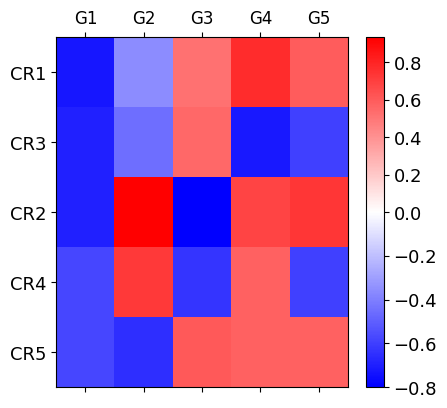

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:609: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:610: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


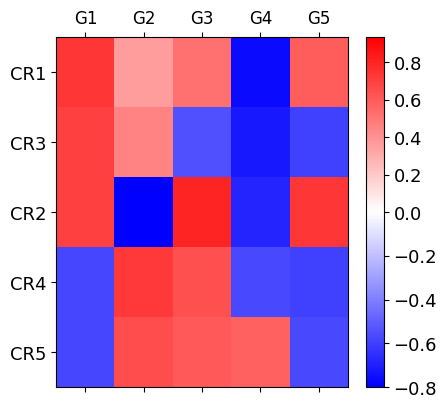

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:609: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:610: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


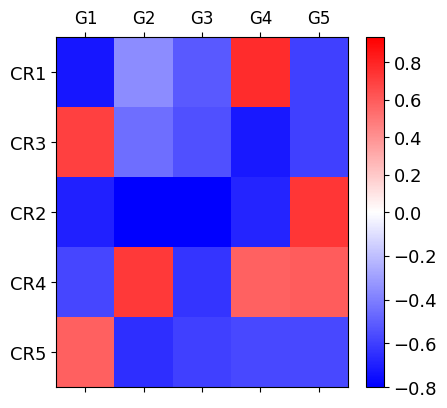

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:609: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:610: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


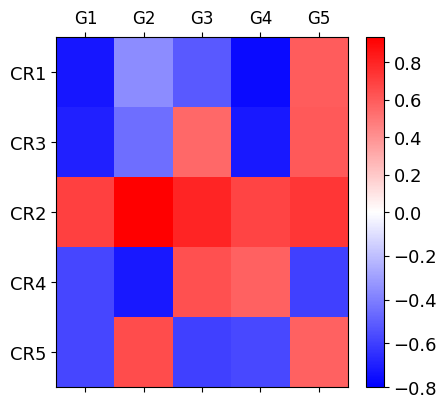

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:609: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:610: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


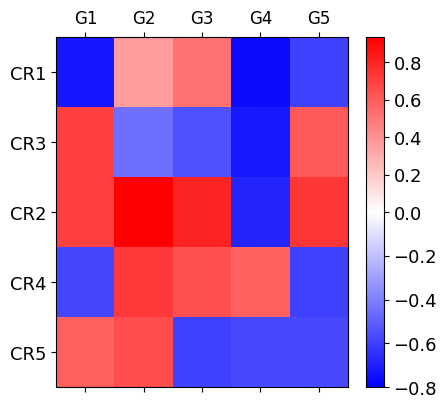

D1, mean:-0.011392055578735842, std:0.6468923981026573


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1121: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:627: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


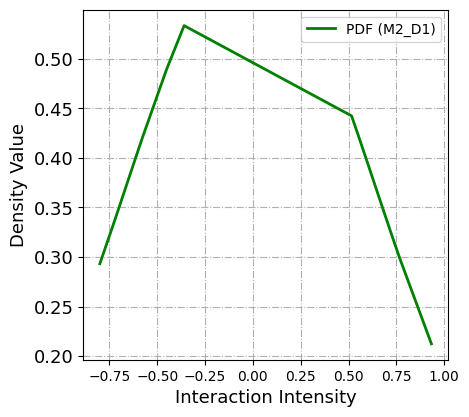

D3, mean:0.06474815294749503, std:0.643744693448578


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1121: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:627: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


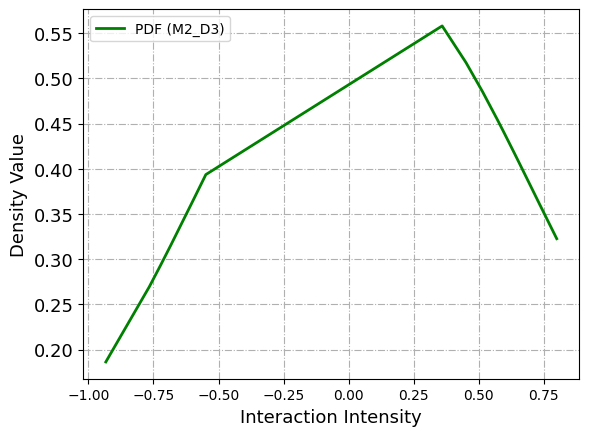

D4, mean:-0.2637817327342011, std:0.5907780895810696


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1121: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:627: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


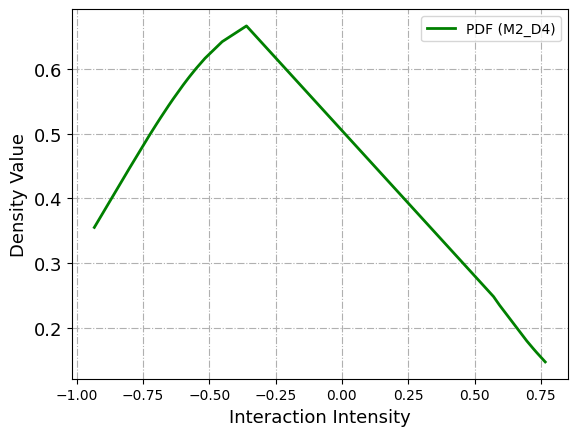

D5, mean:0.005630534160972713, std:0.6469681991708541


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1121: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:627: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


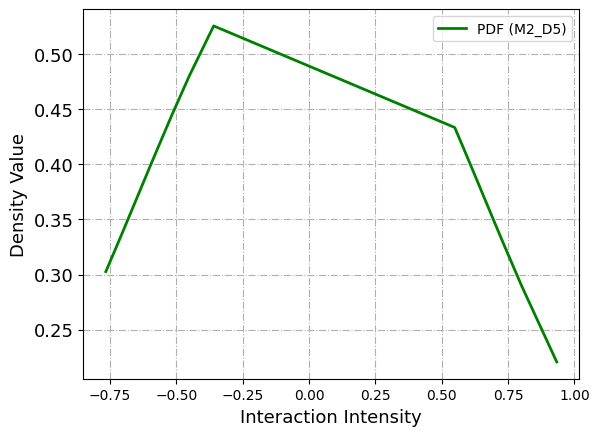

D2, mean:0.043193331081327745, std:0.6455492930856749


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1121: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:627: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


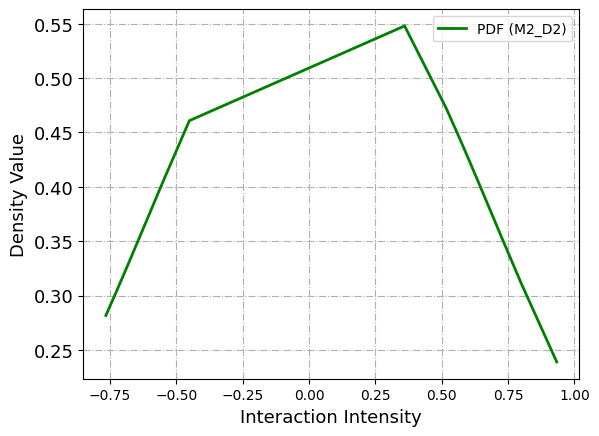

In [25]:
hocmo.plotCorrelationsPerEntity(patterns_AC, tensor_binary, A_names_ranked, B_names_ranked, gene_names, "./data/", "./data/")


In [26]:
patterns_AB_pairs, patterns_AC_pairs, patterns_BC_pairs = hocmo.writeCorrelationsToExcel(patterns_list, ["M1_AB", "M2_AC", "M3_BC"], './data/correlations.xlsx', A_names_ranked, B_names_ranked, gene_names)

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:661: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [27]:
'''
M1_cutoff_ce = 2.890480549 - mean_AB
M2_cutoff_ce = 0.70486722 - mean_AC
M3_cutoff_ce= 2.31192068 - mean_BC
cutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]
M1_cutoff_e = 2.890480549 - mean_AB
M2_cutoff_e = 0.70486722 - mean_BC
M3_cutoff_e= 2.31192068 - mean_BC
cutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]
M1_cutoff_asymptotic = 4.137811156 - mean_AB
M2_cutoff_asymptotic = 1.110098385 - mean_AC
M3_cutoff_asymptotic=  2.342765763 - mean_BC
cutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]
'''

M1_cutoff_ce = 0
M2_cutoff_ce = 0
M3_cutoff_ce= 0
cutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]
M1_cutoff_e = 0
M2_cutoff_e = 0
M3_cutoff_e= 0
cutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]
M1_cutoff_asymptotic = 0
M2_cutoff_asymptotic = 0
M3_cutoff_asymptotic=  0
cutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]

##Reetika to proide info

In [28]:
hocmo.getSignificantEntities([patterns_AB_pairs, patterns_AC_pairs, patterns_BC_pairs], cutoffs_elbow_list, cutoffs_center_elbow_list, cutoffs_asymptotic_list, [mean_AB, mean_AC, mean_BC], ["M1_Elbow", "M2_Elbow", "M3_Elbow"], ["M1_Center_Elbow", "M2_Center_Elbow", "M3_Center_Elbow"], ["M1_Asymptotic", "M2_Asymptotic", "M3_Asymptotic"], './data/SignificantEntities.xlsx')


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1140: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1140: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1140: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1140: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1140: FutureWarning: save is not part of the publi

In [49]:
'''
sig_ligands = ligand_names_ranked
sig_proteins = ['CCNB1','PLK1','RB1pS807S811','RPS6pS240S244','DUSP4','RPS6pS235S236',
            'CDC2','MYH2pS1943'] ## sig based on P, source? 
sig_histones = ['H3K9me2S10ph1K14ac0 ','H3K9me3S10ph1K14ac0 ','H3K18ub1K23ac0 '] ## Prompt for
'''

def calculateHOCScores(sig_A, sig_B, sig_C, A_names_ranked, B_names_ranked, C_names, patterns_AB, patterns_rppa_gcp, filePath, hoc_file_name, hoc_filtered_file_name, all_hoc_score_file_name):
    writer_hoc_score = pd.ExcelWriter(hoc_file_name)
    filtered_writer_hoc_score = pd.ExcelWriter(hoc_filtered_file_name)
    for i in range(patterns_AB.shape[1]):
        ligand_i = np.expand_dims(patterns_AB[:,i], axis=0)
        patterns_rppa_gcp_i = patterns_rppa_gcp * ligand_i.T
        hoc_score_i = pd.DataFrame(data=patterns_rppa_gcp_i, index= protein_names_ranked, columns=histone_names_ranked)
#     hoc_score_i.to_excel(writer_hoc_score, ligand_names_ranked[i])
        filtered_hoc_score_i = hoc_score_i.loc[sig_B, sig_C]
        filtered_hoc_score_i = filtered_hoc_score_i/filtered_hoc_score_i.max().max()
        filtered_hoc_score_i.to_excel(filtered_writer_hoc_score, ligand_names_ranked[i])
    # writer_hoc_score.save()
    filtered_writer_hoc_score.save()
    all_hoc_score_file = os.path.join(filePath, hoc_file_name)
    sig_proteins = ['CCNB1','PLK1','RB1pS807S811','RPS6pS240S244','DUSP4','RPS6pS235S236']
# -----------------------Category 3
    hoc_dict_c3 = {}
    #Functionalize
    all_hoc_score_EGF = pd.read_excel(all_hoc_score_file, sheet_name='EGF').set_index('Protein')
    filtered_hoc_score_EGF_h4 = all_hoc_score_EGF.loc[sig_proteins, 'H4(20to23)K20me0'] ##What are these??
    print(filtered_hoc_score_EGF_h4.max())
    filtered_hoc_score_EGF_h4 = filtered_hoc_score_EGF_h4/1380.100965754926
    for pro in sig_proteins:
        ke = '<EFG,' + pro + ',' + 'H4(20to23)K20me0 >'
        hoc_dict_c3[ke] = filtered_hoc_score_EGF_h4.loc[pro]
    ###

    all_hoc_score_HGF = pd.read_excel(all_hoc_score_file, sheet_name='HGF').set_index('Protein')
    filtered_hoc_score_HGF_h4 = all_hoc_score_HGF.loc[sig_proteins, 'H4(20to23)K20me0']
    print(filtered_hoc_score_HGF_h4.max())
    filtered_hoc_score_HGF_h4 = filtered_hoc_score_HGF_h4/1380.100965754926
    for pro in sig_proteins:
        ke = '<HGF,' + pro + ',' + 'H4(20to23)K20me0 >'
        hoc_dict_c3[ke] = filtered_hoc_score_HGF_h4.loc[pro]
    all_hoc_score_OSM = pd.read_excel(all_hoc_score_file, sheet_name='OSM').set_index('Protein')
    filtered_hoc_score_OSM_h4 = all_hoc_score_OSM.loc[sig_proteins, 'H4(20to23)K20me0']
    print(filtered_hoc_score_OSM_h4.max())
    filtered_hoc_score_OSM_h4 = filtered_hoc_score_OSM_h4/1380.100965754926
    for pro in sig_proteins:
        ke = '<OSM,' + pro + ',' + 'H4(20to23)K20me0 >'
        hoc_dict_c3[ke] = filtered_hoc_score_OSM_h4.loc[pro]
    all_hoc_score_BMP2 = pd.read_excel(all_hoc_score_file, sheet_name='BMP2').set_index('Protein')
    filtered_hoc_score_BMP2_h4 = all_hoc_score_BMP2.loc[sig_proteins, 'H4(20to23)K20me0']
    print(filtered_hoc_score_BMP2_h4.max())
    filtered_hoc_score_BMP2_h4 = filtered_hoc_score_BMP2_h4/1380.100965754926
    for pro in sig_proteins:
        ke = '<BMP2,' + pro + ',' + 'H4(20to23)K20me0 >'
        hoc_dict_c3[ke] = filtered_hoc_score_BMP2_h4.loc[pro]

    all_hoc_score_IFNG = pd.read_excel(all_hoc_score_file, sheet_name='IFNG').set_index('Protein')
    filtered_hoc_score_IFNG_h4 = all_hoc_score_IFNG.loc[sig_proteins, 'H4(20to23)K20me0']
    print(filtered_hoc_score_IFNG_h4.max())
    filtered_hoc_score_IFNG_h4 = filtered_hoc_score_IFNG_h4/1380.100965754926
    for pro in sig_proteins:
        ke = '<IFNG,' + pro + ',' + 'H4(20to23)K20me0 >'
        hoc_dict_c3[ke] = filtered_hoc_score_IFNG_h4.loc[pro]

    all_hoc_score_TGFB = pd.read_excel(all_hoc_score_file, sheet_name='TGFB').set_index('Protein')
    filtered_hoc_score_TGFB_h4 = all_hoc_score_TGFB.loc[sig_proteins, 'H4(20to23)K20me0']
    print(filtered_hoc_score_TGFB_h4.max())
    filtered_hoc_score_TGFB_h4 = filtered_hoc_score_TGFB_h4/1380.100965754926
    for pro in sig_proteins:
        ke = '<TGFB,' + pro + ',' + 'H4(20to23)K20me0 >'
        hoc_dict_c3[ke] = filtered_hoc_score_TGFB_h4.loc[pro]
    hoc_score_file = os.path.join('dataset/PLOS_results_2021-10-27/','HOC_scores_filtered_2.xlsx')        
# hoc_score_file = os.path.join('dataset/PLOS_results_2021-10-27/','HOC_scores_filtered.xlsx')# filtered_2 : Not found. File name 
                                                                                            # generated is filtered.xlsx     
    EGF_hoc = pd.read_excel(hoc_score_file, sheet_name='EGF').set_index('Protein')
    HGF_hoc = pd.read_excel(hoc_score_file, sheet_name='HGF').set_index('Protein')
    OSM_hoc = pd.read_excel(hoc_score_file, sheet_name='OSM').set_index('Protein')
    BMP2_hoc = pd.read_excel(hoc_score_file, sheet_name='BMP2').set_index('Protein')
    IFNG_hoc = pd.read_excel(hoc_score_file, sheet_name='IFNG').set_index('Protein')
    TGFB_hoc = pd.read_excel(hoc_score_file, sheet_name='TGFB').set_index('Protein')
    print(EGF_hoc.max().max())
    print(HGF_hoc.max().max())
    print(OSM_hoc.max().max())
    print(BMP2_hoc.max().max())
    print(IFNG_hoc.max().max())
    print(TGFB_hoc.max().max())
    hoc_score_file = os.path.join('dataset/PLOS_results_2021-10-27/','HOC_scores_filtered_2.xlsx')
# hoc_score_file = os.path.join('dataset/PLOS_results_2021-10-27/','HOC_scores_filtered.xlsx')
    EGF_hoc = pd.read_excel(hoc_score_file, sheet_name='EGF').set_index('Protein')
    HGF_hoc = pd.read_excel(hoc_score_file, sheet_name='HGF').set_index('Protein')
    OSM_hoc = pd.read_excel(hoc_score_file, sheet_name='OSM').set_index('Protein')
    BMP2_hoc = pd.read_excel(hoc_score_file, sheet_name='BMP2').set_index('Protein')
    IFNG_hoc = pd.read_excel(hoc_score_file, sheet_name='IFNG').set_index('Protein')
    TGFB_hoc = pd.read_excel(hoc_score_file, sheet_name='TGFB').set_index('Protein')

# -----------------------Category 1
    hoc_dict_c1 = {}
    sig_proteins = ['CCNB1','PLK1','RB1pS807S811','RPS6pS240S244','DUSP4','RPS6pS235S236']
    sig_histones = ['H3K9me2S10ph1K14ac0 ','H3K9me3S10ph1K14ac0 ']
    for pro in sig_proteins:
        for his in sig_histones:
            ke = '<EFG,' + pro + ',' + his + '>'
            hoc_dict_c1[ke] = EGF_hoc.loc[pro][his]/1380.100965754926
    for pro in sig_proteins:
        for his in sig_histones:
            ke = '<HGF,' + pro + ',' + his + '>'
            hoc_dict_c1[ke] = HGF_hoc.loc[pro][his]/1380.100965754926
    for pro in sig_proteins:
        for his in sig_histones:
            ke = '<OSM,' + pro + ',' + his + '>'
            hoc_dict_c1[ke] = OSM_hoc.loc[pro][his]/1380.100965754926
    for pro in sig_proteins:
        for his in sig_histones:
            ke = '<BMP2,' + pro + ',' + his + '>'
            hoc_dict_c1[ke] = BMP2_hoc.loc[pro][his]/1380.100965754926
    for pro in sig_proteins:
        for his in sig_histones:
            ke = '<IFNG,' + pro + ',' + his + '>'
            hoc_dict_c1[ke] = IFNG_hoc.loc[pro][his]/1380.100965754926
    for pro in sig_proteins:
        for his in sig_histones:
            ke = '<TGFB,' + pro + ',' + his + '>'
            hoc_dict_c1[ke] = TGFB_hoc.loc[pro][his]/1380.100965754926

# -----------------------Category 2        
    hoc_dict_c2 = {}
    sig_proteins = ['CCNB1','PLK1','RB1pS807S811','RPS6pS240S244','DUSP4','RPS6pS235S236',
                'CDC2','MYH2pS1943']
    sig_histones = ['H3K18ub1K23ac0 ']
    for pro in sig_proteins:
        for his in sig_histones:
            ke = '<EFG,' + pro + ',' + his + '>'
            hoc_dict_c2[ke] = EGF_hoc.loc[pro][his]/1380.100965754926
        
# -----------------------Category 3
# hoc_dict_c3

    all_hoc_score_group = pd.ExcelWriter(all_hoc_score_file_name)
    hoc_score_g1 = pd.DataFrame(data=hoc_dict_c1.values(), index= hoc_dict_c1.keys(), columns=['HOC_scores'])
    hoc_score_g2 = pd.DataFrame(data=hoc_dict_c2.values(), index= hoc_dict_c2.keys(), columns=['HOC_scores'])
    hoc_score_g3 = pd.DataFrame(data=hoc_dict_c3.values(), index= hoc_dict_c3.keys(), columns=['HOC_scores'])
    hoc_score_g1.to_excel(all_hoc_score_group, 'Fig10b')
    hoc_score_g2.to_excel(all_hoc_score_group, 'Fig10c')
    hoc_score_g3.to_excel(all_hoc_score_group, 'Fig10d')
    all_hoc_score_group.save()
    hoc_score_i.loc[sig_proteins, sig_histones]
    print(patterns_AB.shape)
    print(protein_names_ranked)
    print(ligand_names_ranked)
    print(patterns_rppa_gcp.shape)
    print(protein_names_ranked)
    print(histone_names_ranked)

